# Importing required libraries

In [1]:
from numpy import mean
from numpy import std

from matplotlib import pyplot as plt

from sklearn.model_selection import KFold

from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD

#Splitting the data

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


# visualising the data

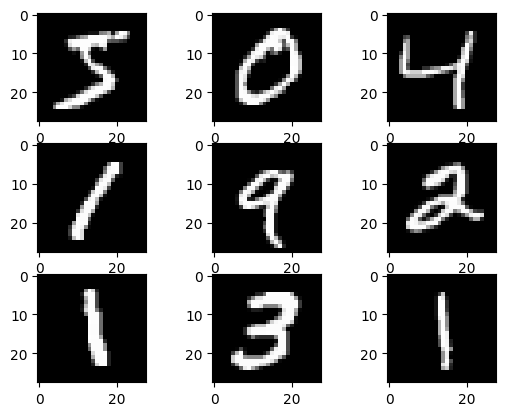

In [3]:
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

# Developing a model

In [4]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [5]:
def load_dataset():
 (trainX, trainY), (testX, testY) = mnist.load_data()
 trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
 testX = testX.reshape((testX.shape[0], 28, 28, 1))
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY

In [6]:
def prep_pixels(train, test):
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 return train_norm, test_norm

In [7]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [8]:
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_ix, test_ix in kfold.split(dataX):
		model = define_model()
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [9]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

In [10]:
def summarize_performance(scores):
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	plt.boxplot(scores)
	plt.show()

In [11]:
def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	scores, histories = evaluate_model(trainX, trainY)
	summarize_diagnostics(histories)
	summarize_performance(scores)

> 98.600
> 98.675
> 98.508
> 98.850
> 98.825


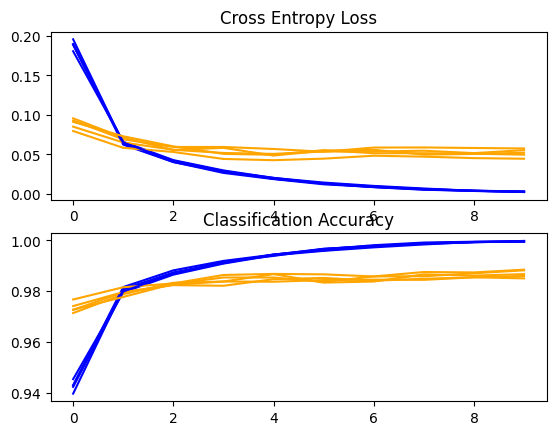

Accuracy: mean=98.692 std=0.130, n=5


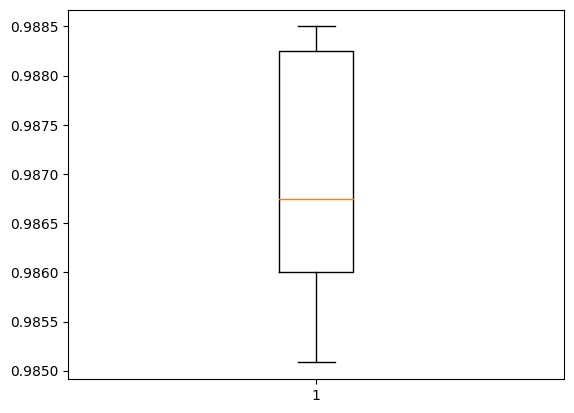

In [12]:
run_test_harness()

# Outcome:



*   **the output accuracy have increased gradually more and more by the k folds processed**
*   **the classification accuracy has also increased gradually.**
*   **the final output accuracy of the model is 98.825% which is a acceptable one.**

